<a href="https://colab.research.google.com/github/hirdeshkumar2407/NLP_Group_Assigment/blob/main/Training%20models/3_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3 different ways tested. 1 is same as 11th notebook and works but sounds bad. 2 doesn't work yet. 3 works and sounds good**

# 1- Old way:
Works, fast but sometimes robotic

In [1]:
!pip install numpy scipy librosa unidecode inflect
#!apt-get update
#!apt-get install -y libsndfile1

In [2]:
import torch
tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tacotron2', model_math='fp16')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn

Tacotron2(
  (embedding): Embedding(148, 512)
  (encoder): Encoder(
    (convolutions): ModuleList(
      (0-2): 3 x Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (lstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (prenet): Prenet(
      (layers): ModuleList(
        (0): LinearNorm(
          (linear_layer): Linear(in_features=80, out_features=256, bias=False)
        )
        (1): LinearNorm(
          (linear_layer): Linear(in_features=256, out_features=256, bias=False)
        )
      )
    )
    (attention_rnn): LSTMCell(768, 1024)
    (attention_layer): Attention(
      (query_layer): LinearNorm(
        (linear_layer): Linear(in_features=1024, out_features=128, bias=False)
      )
      (memory_layer): LinearNorm(
        (linear_layer): Linear(in_fea

In [3]:
waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp16')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0-3): 4 x WN(
      (in_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0-6): 7 x Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
        (7

Put text here:**bold text**

In [18]:
text = "This is a simple test! It sounds bad but atleast it doesn't crash the runtime"

In [19]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')
sequences, lengths = utils.prepare_input_sequence([text])
sequences

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


tensor([[57, 45, 46, 56, 11, 46, 56, 11, 38, 11, 56, 46, 50, 53, 49, 42, 11, 57,
         42, 56, 57,  2, 11, 46, 57, 11, 56, 52, 58, 51, 41, 56, 11, 39, 38, 41,
         11, 39, 58, 57, 11, 38, 57, 49, 42, 38, 56, 57, 11, 46, 57, 11, 41, 52,
         42, 56, 51,  3, 57, 11, 40, 55, 38, 56, 45, 11, 57, 45, 42, 11, 55, 58,
         51, 57, 46, 50, 42]], device='cuda:0')

In [20]:
with torch.no_grad():
    mel, _, _ = tacotron2.infer(sequences, lengths)

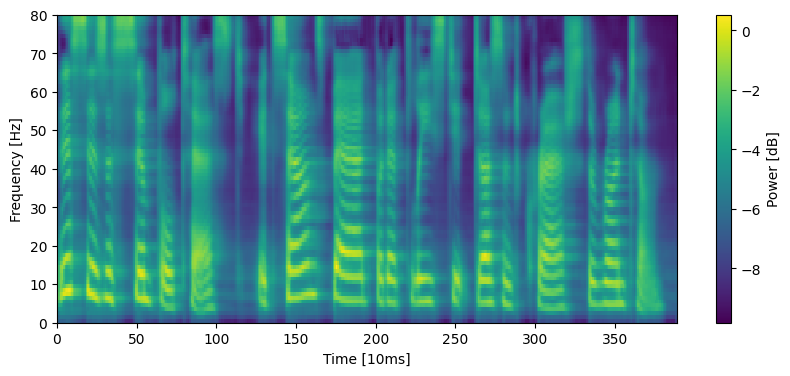

In [21]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,4))
plt.pcolormesh(mel[0].cpu().numpy())
plt.colorbar(label='Power [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [10ms]')
plt.show()

In [22]:
with torch.no_grad():
    audio = waveglow.infer(mel)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050
audio_numpy

array([-0.00049306, -0.00035355, -0.0002153 , ...,  0.00019003,
        0.00038406,  0.00037309], dtype=float32)

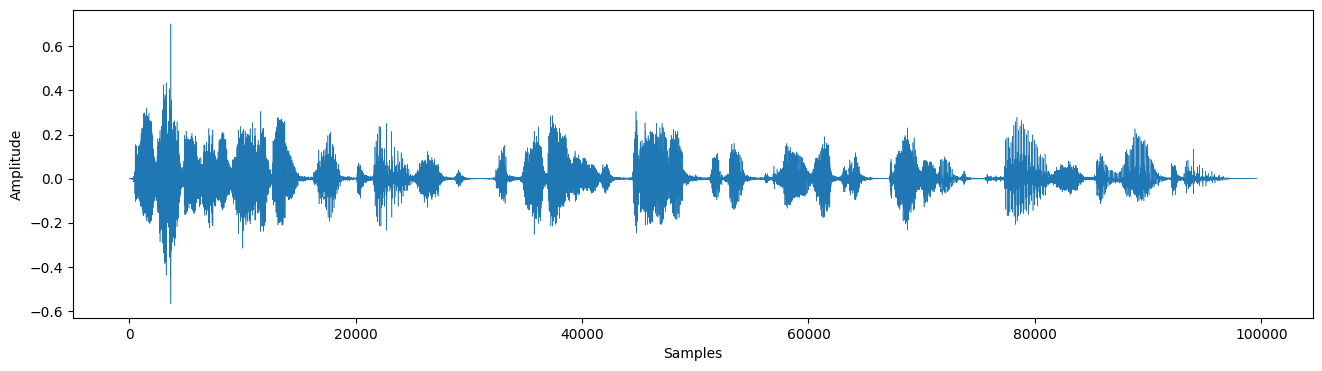

In [23]:
fig = plt.figure(figsize=(16,4))
plt.plot(audio_numpy, linewidth=0.4)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

In [24]:
from IPython.display import Audio
Audio(audio_numpy, rate=rate)

# 2- Another way:

Not working, session crash because of ram limitation. TBD: Try a lighter model

In [2]:
# Ensure you have a GPU runtime selected!
# Runtime -> Change runtime type -> T4 GPU (or A100/V100 if you have Pro)

# Install Coqui TTS library
!pip install TTS

# Import necessary libraries
import torch
from TTS.api import TTS
import soundfile as sf
from IPython.display import Audio
# Import the specific config class that is causing the error
from TTS.tts.configs.xtts_config import XttsConfig

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Add the necessary custom class to PyTorch's safe globals list
# This is a workaround for the UnpicklingError with torch.load's weights_only=True default
torch.serialization.add_safe_globals([XttsConfig])

PyTorch version: 2.6.0+cu124
CUDA available: True


In [3]:
# Download a sample audio file to use as a default reference
# This is a sample from the VCTK dataset (Speaker p225)
!wget -O default_speaker_ref.wav https://jik876.github.io/hifi-gan-demo/samples/ss/GT/ss_gt_1.wav
import os
# Verify download
if os.path.exists("default_speaker_ref.wav"):
    print("Default speaker reference audio downloaded.")
    default_speaker_ref_path = "default_speaker_ref.wav"
else:
    print("Failed to download reference audio. Please check the URL or try manually uploading one.")
    default_speaker_ref_path = None # Handle this case if download fails

--2025-05-22 23:39:43--  https://jik876.github.io/hifi-gan-demo/samples/ss/GT/ss_gt_1.wav
Resolving jik876.github.io (jik876.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jik876.github.io (jik876.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 309094 (302K) [audio/wav]
Saving to: ‘default_speaker_ref.wav’

default_speaker_ref 100%[===================>] 301.85K  --.-KB/s    in 0.004s  

2025-05-22 23:39:43 (69.9 MB/s) - ‘default_speaker_ref.wav’ saved [309094/309094]

Default speaker reference audio downloaded.


In [ ]:
# Determine device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the XTTS v2 model
# This will download the model (approx. 20GB) the first time, it might take a while.
print("Loading XTTS v2 model (this may take a few minutes)...")
try:
    tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True if device == "cuda" else False)
    print("XTTS v2 model loaded successfully.")
except Exception as e:
    print(f"Error loading XTTS v2 model: {e}")
    print("Please ensure GPU is available and you have enough memory.")
    # Fallback to CPU if GPU fails, though generation will be much slower
    tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=False)


# Text to synthesize
text_to_synthesize = "Hello there! This is an example of XTTS v2 using a consistent default speaker. It sounds quite natural, doesn't it?"
output_audio_file = "xtts_default_speaker_output.wav"

if default_speaker_ref_path and os.path.exists(default_speaker_ref_path):
    print(f"\nGenerating speech using '{default_speaker_ref_path}' as reference...")
    try:
        tts.tts_to_file(
            text=text_to_synthesize,
            speaker_wav=default_speaker_ref_path, # Use the downloaded/provided reference
            language="en",                        # Specify the language of your text
            file_path=output_audio_file
        )
        print(f"Speech saved to {output_audio_file}")
        # Play the generated audio
        print("\nPlaying generated audio:")
        display(Audio(output_audio_file))

    except Exception as e:
        print(f"An error occurred during speech generation: {e}")
        print("Ensure the language ('en') is correct and the speaker_wav path is valid.")
else:
    print("\nCould not find a valid default speaker reference audio. Speech generation skipped.")
    print("Please ensure 'default_speaker_ref.wav' was downloaded successfully or upload your own.")

Using device: cuda
Loading XTTS v2 model (this may take a few minutes)...
 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts


# 3- Another attempt for a better way: (working)

This one WORKS and sounds good! After running the code below once, you might need to restart the session from the runtime menu and run it again for imports to work properly.

In [2]:
# --- Step 1: Ensure GPU Runtime and Install Coqui TTS ---
# Make sure your Colab runtime is set to GPU (Runtime -> Change runtime type -> T4 GPU or similar)

print("Installing Coqui TTS...")
!pip install TTS soundfile==0.12.1 # soundfile version might need to be pinned for compatibility
print("Coqui TTS installed.")

# Install espeak-ng for phonemization
print("Installing espeak-ng...")
!apt-get update && apt-get install -y espeak-ng
print("espeak-ng installed.")

import torch
from TTS.api import TTS
import soundfile as sf
from IPython.display import Audio
import os # For checking file existence

Installing Coqui TTS...
Coqui TTS installed.
Installing espeak-ng...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
R

In [3]:
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# --- Step 2: Determine Device ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- Step 3: Load the VITS Model ---
# This will download the model (approx. 200-300MB) the first time.
# The 'tts_models/en/ljspeech/vits' model is a single-speaker model,
# so it doesn't require a speaker_wav for voice cloning.
print("\nLoading VITS model for LJSpeech (this may take a moment)...")
try:
    tts_vits = TTS("tts_models/en/ljspeech/vits", gpu=True if device == "cuda" else False)
    print("VITS model loaded successfully.")
except Exception as e:
    print(f"Error loading VITS model: {e}")
    print("Please ensure GPU is available and you have enough memory.")
    print("Falling back to CPU if GPU failed, but generation will be much slower.")
    tts_vits = TTS("tts_models/en/ljspeech/vits", gpu=False)

# --- Step 4: Synthesize Speech ---
text_to_synthesize = "Hello there! This is a very natural sounding voice generated by a VITS model. It's quite fast too."
output_audio_file = "vits_output_ljspeech.wav"

print(f"\nGenerating speech for: '{text_to_synthesize}'")
try:
    tts_vits.tts_to_file(
        text=text_to_synthesize,
        file_path=output_audio_file
        # No speaker_wav or speaker_id needed for this single-speaker model!
    )
    print(f"Speech saved to {output_audio_file}")

    # --- Step 5: Play the Generated Audio ---
    if os.path.exists(output_audio_file):
        print("\nPlaying generated audio:")
        display(Audio(output_audio_file))
    else:
        print(f"Error: Output file {output_audio_file} was not created.")

except Exception as e:
    print(f"An error occurred during speech generation: {e}")

PyTorch version: 2.6.0+cu124
CUDA available: True
Using device: cuda

Loading VITS model for LJSpeech (this may take a moment)...
 > tts_models/en/ljspeech/vits is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


/usr/local/lib/python3.11/dist-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


VITS model loaded successfully.

Generating speech for: 'Hello there! This is a very natural sounding voice generated by a VITS model. It's quite fast too.'
 > Text splitted to sentences.
['Hello there!', 'This is a very natural sounding voice generated by a VITS model.', "It's quite fast too."]
 > Processing time: 0.514136552810669
 > Real-time factor: 0.06568503169020146
Speech saved to vits_output_ljspeech.wav

Playing generated audio:
